<h1>electric_vehicle_analytics</h1>

<h2>Introduction</h2>

The automobile industry is undergoing a major transformation with the rapid adoption of Electric Vehicles (EVs) as a sustainable alternative to traditional fuel-powered vehicles. EVs are gaining popularity worldwide due to their eco-friendly nature, lower operating costs, and government incentives. However, understanding the performance, costs, and long-term benefits of EVs requires a deeper look into multiple factors such as battery health, charging efficiency, usage type, maintenance costs, and resale value.

This dataset provides a comprehensive view of 3,000 electric vehicles across different makes, models, years, regions, and usage types. It contains technical specifications (battery, range, speed, charging), environmental impact (CO₂ saved), and financial details (maintenance, insurance, charging, and resale values).

By performing Exploratory Data Analysis (EDA) on this dataset, we aim to uncover patterns and insights related to EV performance, cost-effectiveness, and sustainability. These insights will help stakeholders, including manufacturers, policymakers, and consumers, in making data-driven decisions about the future of electric mobility.

<h3> Import the necessary libraries</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Import Dataset</h3>

In [3]:
df = pd.read_csv("c:\\data_science\\project\\electric_vehicle_analytics.csv")

<h3> Display the first 5 rows of the dataset</h3>

In [4]:
print(df.head())

   Vehicle_ID     Make          Model  Year         Region Vehicle_Type  \
0           1   Nissan           Leaf  2021           Asia          SUV   
1           2   Nissan           Leaf  2020      Australia        Sedan   
2           3  Hyundai  Kona Electric  2021  North America          SUV   
3           4     Audi      Q4 e-tron  2022         Europe    Hatchback   
4           5    Tesla        Model 3  2022      Australia        Truck   

   Battery_Capacity_kWh  Battery_Health_%  Range_km  Charging_Power_kW  ...  \
0                 101.7              75.5       565              153.6  ...   
1                  30.1              99.8       157              157.2  ...   
2                 118.5              84.0       677              173.6  ...   
3                  33.1              97.3       149              169.3  ...   
4                  81.3              85.6       481              212.8  ...   

   Max_Speed_kmh  Acceleration_0_100_kmh_sec  Temperature_C  Usage_Type  \

<h3> Display the last 5 rows of the dataset</h3>

In [5]:
print(df.tail())

      Vehicle_ID      Make           Model  Year         Region Vehicle_Type  \
2995        2996  Mercedes             EQS  2021  North America          SUV   
2996        2997      Ford  Mustang Mach-E  2022         Europe    Hatchback   
2997        2998       Kia         Niro EV  2024         Europe        Truck   
2998        2999  Mercedes             EQC  2015  North America        Truck   
2999        3000      Audi       Q4 e-tron  2023  North America    Hatchback   

      Battery_Capacity_kWh  Battery_Health_%  Range_km  Charging_Power_kW  \
2995                  57.2              84.0       239              102.2   
2996                  98.4              83.1       498              160.6   
2997                  35.1              82.1       189               18.1   
2998                  69.4              98.4       336               94.7   
2999                  70.2              82.6       387              232.8   

      ...  Max_Speed_kmh  Acceleration_0_100_kmh_sec  Te

<h3>Data cleaning</h3>

In [6]:
# Check whether there are any missing values
print(df.isna().sum())

Vehicle_ID                          0
Make                                0
Model                               0
Year                                0
Region                              0
Vehicle_Type                        0
Battery_Capacity_kWh                0
Battery_Health_%                    0
Range_km                            0
Charging_Power_kW                   0
Charging_Time_hr                    0
Charge_Cycles                       0
Energy_Consumption_kWh_per_100km    0
Mileage_km                          0
Avg_Speed_kmh                       0
Max_Speed_kmh                       0
Acceleration_0_100_kmh_sec          0
Temperature_C                       0
Usage_Type                          0
CO2_Saved_tons                      0
Maintenance_Cost_USD                0
Insurance_Cost_USD                  0
Electricity_Cost_USD_per_kWh        0
Monthly_Charging_Cost_USD           0
Resale_Value_USD                    0
dtype: int64


In [7]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ','_')

In [8]:
# Check for duplicate rows
df.duplicated().sum()

0

<h3>Data Understanding</h3>

In [9]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle_ID                        3000 non-null   int64  
 1   Make                              3000 non-null   object 
 2   Model                             3000 non-null   object 
 3   Year                              3000 non-null   int64  
 4   Region                            3000 non-null   object 
 5   Vehicle_Type                      3000 non-null   object 
 6   Battery_Capacity_kWh              3000 non-null   float64
 7   Battery_Health_%                  3000 non-null   float64
 8   Range_km                          3000 non-null   int64  
 9   Charging_Power_kW                 3000 non-null   float64
 10  Charging_Time_hr                  3000 non-null   float64
 11  Charge_Cycles                     3000 non-null   int64  
 12  Energy

In [10]:
# Use summary statistics to understand distributions.
print(df.describe())

        Vehicle_ID         Year  Battery_Capacity_kWh  Battery_Health_%  \
count  3000.000000  3000.000000           3000.000000       3000.000000   
mean   1500.500000  2019.499667             74.810100         85.030000   
std     866.169729     2.848047             25.734079          8.589526   
min       1.000000  2015.000000             30.000000         70.000000   
25%     750.750000  2017.000000             53.000000         77.775000   
50%    1500.500000  2020.000000             74.850000         85.250000   
75%    2250.250000  2022.000000             96.900000         92.300000   
max    3000.000000  2024.000000            120.000000        100.000000   

          Range_km  Charging_Power_kW  Charging_Time_hr  Charge_Cycles  \
count  3000.000000        3000.000000       3000.000000    3000.000000   
mean    374.414667         129.301000          1.203570    1107.009667   
std     137.184112          68.742745          1.421866     510.834590   
min     121.000000          

In [11]:
#Which year has the highest number of EVs in the dataset?
df['Year'].value_counts().idxmax()


2020

In [12]:
#Which vehicle has the highest resale value?
df.loc[df['Resale_Value_USD'].idxmax(), ['Make','Model','Resale_Value_USD']]


Make                Nissan
Model                 Leaf
Resale_Value_USD     35521
Name: 671, dtype: object

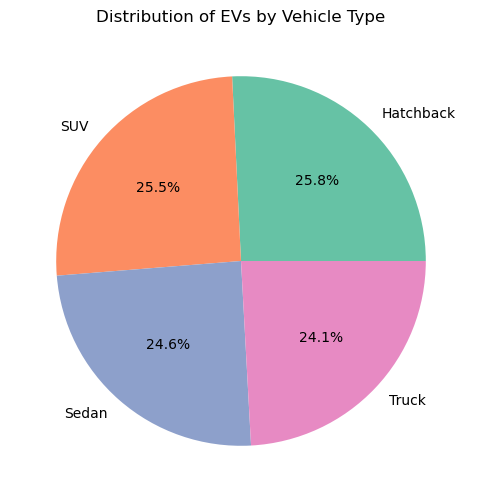

In [13]:
# What is the distribution of EVs across different vehicle types?
df['Vehicle_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=sns.color_palette("Set2"))
plt.title("Distribution of EVs by Vehicle Type")
plt.ylabel("")
plt.show()


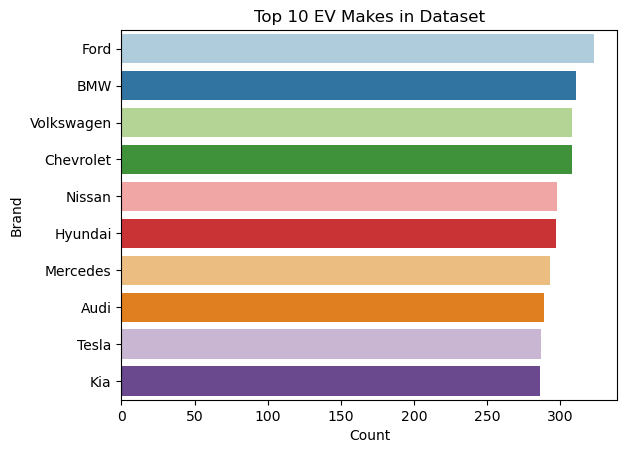

In [14]:
# Which EV makes (brands) have the most entries in the dataset?
top_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index, palette="Paired")
plt.title("Top 10 EV Makes in Dataset")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()


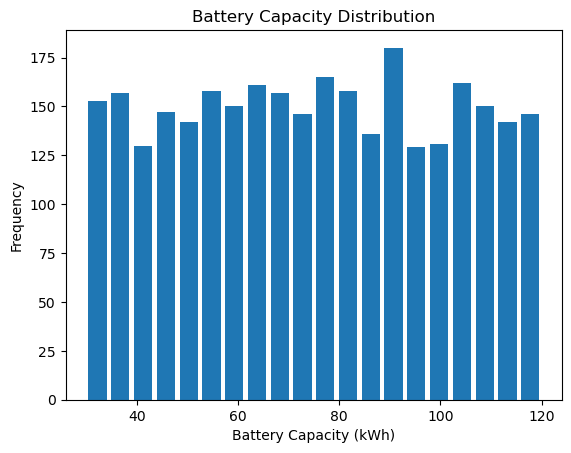

In [15]:
# What is the distribution of battery capacity (kWh) among EVs?
plt.hist(df['Battery_Capacity_kWh'], bins=20, rwidth=0.8)  # rwidth < 1 leaves space between bars
plt.title("Battery Capacity Distribution")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Frequency")
plt.show()



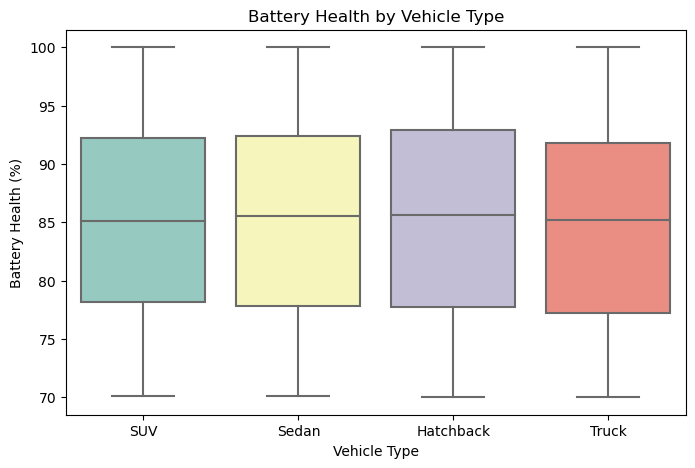

In [16]:
# How does battery health (%) vary across vehicle types?
plt.figure(figsize=(8,5))
sns.boxplot(x='Vehicle_Type', y='Battery_Health_%', data=df, palette="Set3")
plt.title("Battery Health by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Battery Health (%)")
plt.show()


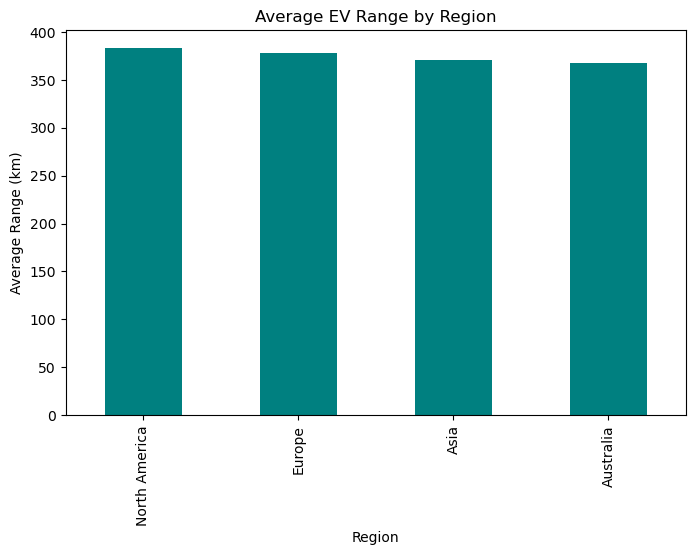

In [17]:
# What is the average range (km) of EVs across different regions?
avg_range = df.groupby('Region')['Range_km'].mean().sort_values(ascending=False)
avg_range.plot(kind='bar', color="teal", figsize=(8,5))
plt.title("Average EV Range by Region")
plt.xlabel("Region")
plt.ylabel("Average Range (km)")
plt.show()


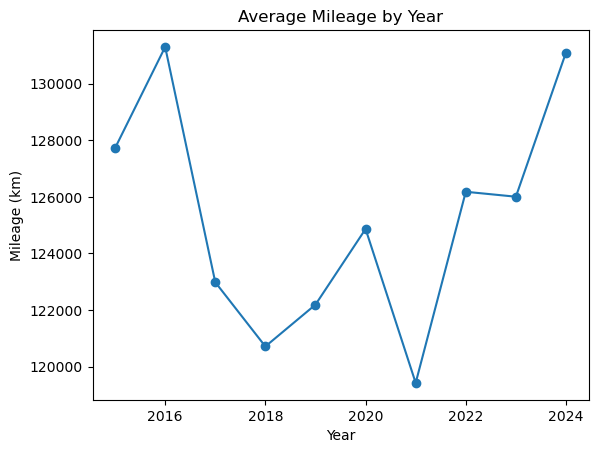

In [18]:
#How has average mileage changed over years?
df.groupby('Year')['Mileage_km'].mean().plot(kind='line', marker='o')
plt.title("Average Mileage by Year")
plt.xlabel("Year")
plt.ylabel("Mileage (km)")
plt.show()



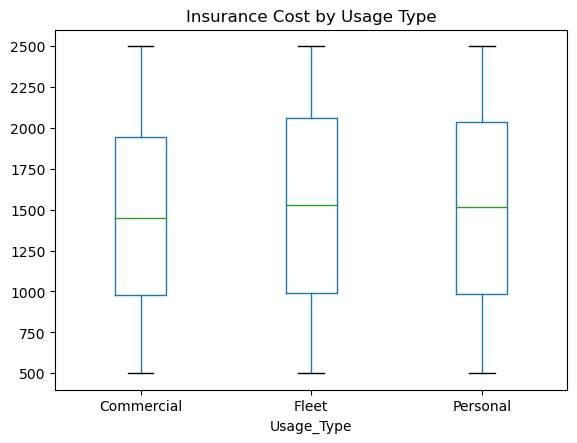

In [19]:
#How does insurance cost vary by usage type?
df.boxplot(column='Insurance_Cost_USD', by='Usage_Type', grid=False)
plt.title("Insurance Cost by Usage Type")
plt.suptitle("")
plt.show()



<h3>Outlier Detection</h3>

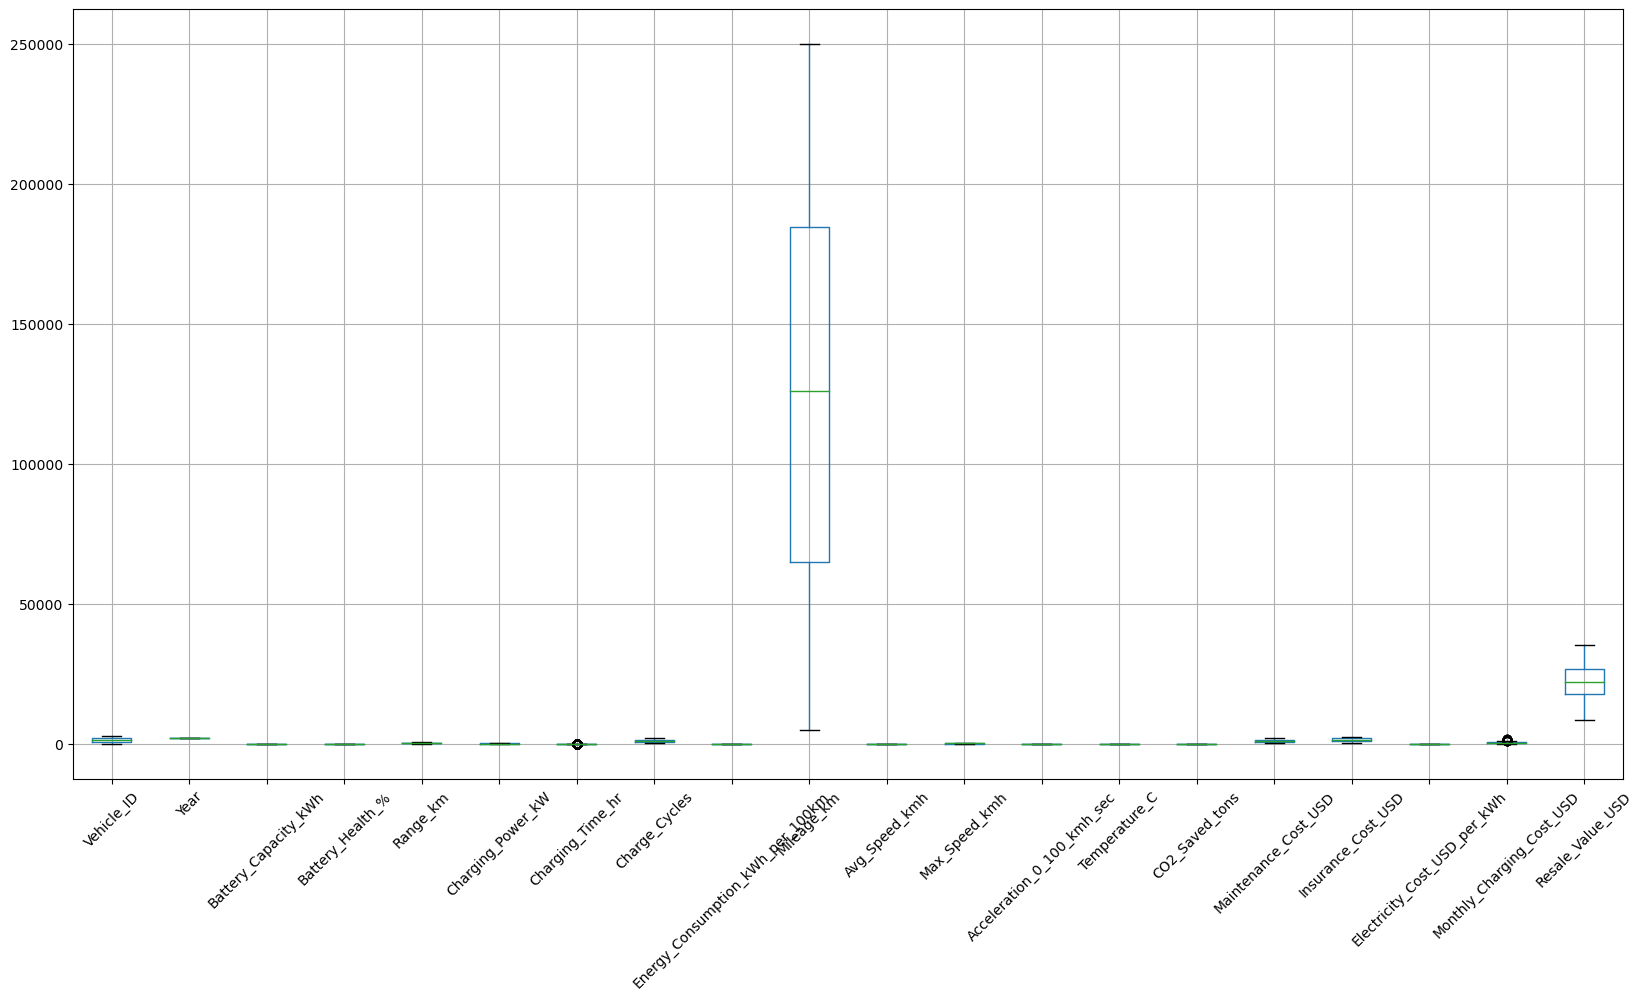

In [20]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

<h3>Suggestions and Recommendations</h3>

<h3>Suggestions & Recommendations</h3>

1.Improve Battery Efficiency
Since battery health and charging cycles strongly affect vehicle range and resale value, manufacturers should work on advanced battery technologies and encourage drivers to follow good charging practices to maintain efficiency.

2.Enhance Charging Infrastructure
The analysis shows average charging time is still long for many EVs. Expanding fast-charging stations in urban and highway areas will make EVs more convenient and reliable for all usage types.

3.Focus on Cost Reduction
Maintenance and insurance costs vary across vehicle types and usage. Introducing affordable EV models and offering cost subsidies can increase adoption among common users, not just premium buyers.

4.Encourage Fleet Electrification
Commercial and fleet EVs contribute significantly to CO₂ savings. Governments and companies should promote fleet-based EV adoption (taxis, delivery vans, buses) to maximize environmental benefits.

5.Provide Regional Incentives
Regions with stronger policies show better EV performance and adoption. Policymakers in other regions should introduce tax benefits, purchase subsidies, and resale guarantees to boost adoption.

6.Educate Consumers
Many EVs differ in energy consumption and efficiency. Conducting awareness campaigns can help consumers choose the right EVs and adopt eco-friendly driving habits.

7.Support Resale Market
Since resale value is an important factor, creating structured resale and exchange programs will increase consumer trust in EV investments.